In [1]:
%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize

from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock


matplotlib.rcParams['figure.figsize'] = (9, 6)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 24
P.rc('xtick', labelsize=18) 
P.rc('ytick', labelsize=18)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)


# sys.path.append("/Users/amadeus/Documents/10.semester/ma")
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, W_tophat, T_obs, nutoz21, h
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, T_obs, nutoz21, h
from magmod import *
from magbias_experiments import SKA_zhangpen, CLAR_zhangpen, SKA, cb_hirax as hirax, hirax512, LSST, LSST_nosgfit, n
from lf_photometric import nz_distribution

sigma_8_BBKS = 0.833959881058

#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 
Rescaling the galaxy number density by a factor of 104112.030661 to match the gold sample with 6330073646.61 total galaxies 
#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 



In [2]:

dNfile = "LSST/nz_gold.txt"
# dNfile = LSST["dNdz"]
ztab_file, dNdztab_file = np.loadtxt(dNfile, unpack = True)

dNdzinterp = interp1d(ztab_file, dNdztab_file, kind='linear', bounds_error=False)

zint = np.linspace(0.001, 3.9, 200)

# nztab = np.array([nz_distribution(zz, 27, 'all')[0] for zz in zint])
nztab = nofz(zint, 27)
dNdztab = dNdzinterp(zint)

#go to all sky
nztab *= 4*np.pi
dNdztab *= 60**2 * 41200


Nztab_func = integrate.cumtrapz(nztab, zint, initial = 0)
Nztab_file = integrate.cumtrapz(dNdztab, zint, initial = 0)




/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


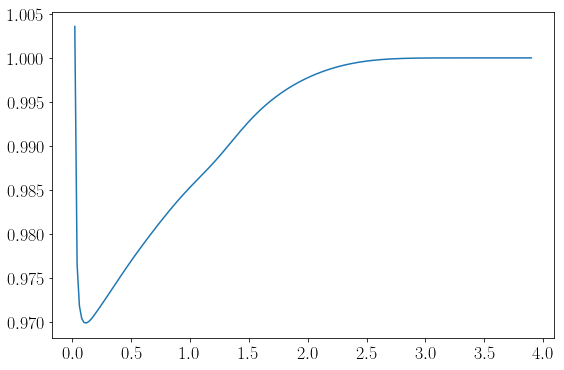

In [3]:
fig = P.figure(); ax =fig.add_subplot(111);
# ax.plot(zint, Nztab_func)
# ax.plot(zint, Nztab_file, c='gold')

ax.plot(zint, Nztab_file/Nztab_func)

# ax.axhline(4*np.pi)